In [1]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import geopandas as gpd
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
import plotly.graph_objects as go

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.shx
/kaggle/input/india-states/Igismap/Indian_States.dbf


In [2]:

#importing main dataset 
df = pd.read_csv('../input/covid19-in-india/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

#importing tests dataset
tests = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv' )
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [3]:
df.tail(5)

date                             state  cured  deaths  confirmed
4210 2020-07-17                           Tripura   1604       3       2283
4211 2020-07-17                       Uttarakhand   2995      50       3982
4212 2020-07-17                     Uttar Pradesh  26675    1046      43441
4213 2020-07-17                       West Bengal  21415    1023      36117
4214 2020-07-17  Cases being reassigned to states      0       0        531

This dataset contains information about number of confirmed , deaths and cured in each state daily . This dataset is taken from Ministry of Health & Family Welfare.

# **Current Situation**

In [4]:
#current date
today = df[df.date == '2020-07-15']

In [5]:
gdf = gpd.read_file('../input/india-states/Igismap/Indian_States.shp')
#renaming state names
gdf['st_nm'].replace({"Andaman & Nicobar Island": "Andaman and Nicobar Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra and Nagar Haveli and Daman and Diu',
                      'Jammu & Kashmir':'Jammu and Kashmir',
                      'NCT of Delhi':'Delhi'}, inplace=True)
merged = gdf.merge(today ,  left_on='st_nm', right_on='state')
merged.state.replace({"Andaman and Nicobar Islands" : "A & N",
                      'Dadra and Nagar Haveli and Daman and Diu' : 'Daman & Diu',
                      'Jammu and Kashmir' : 'J & K'
                      }, inplace=True)


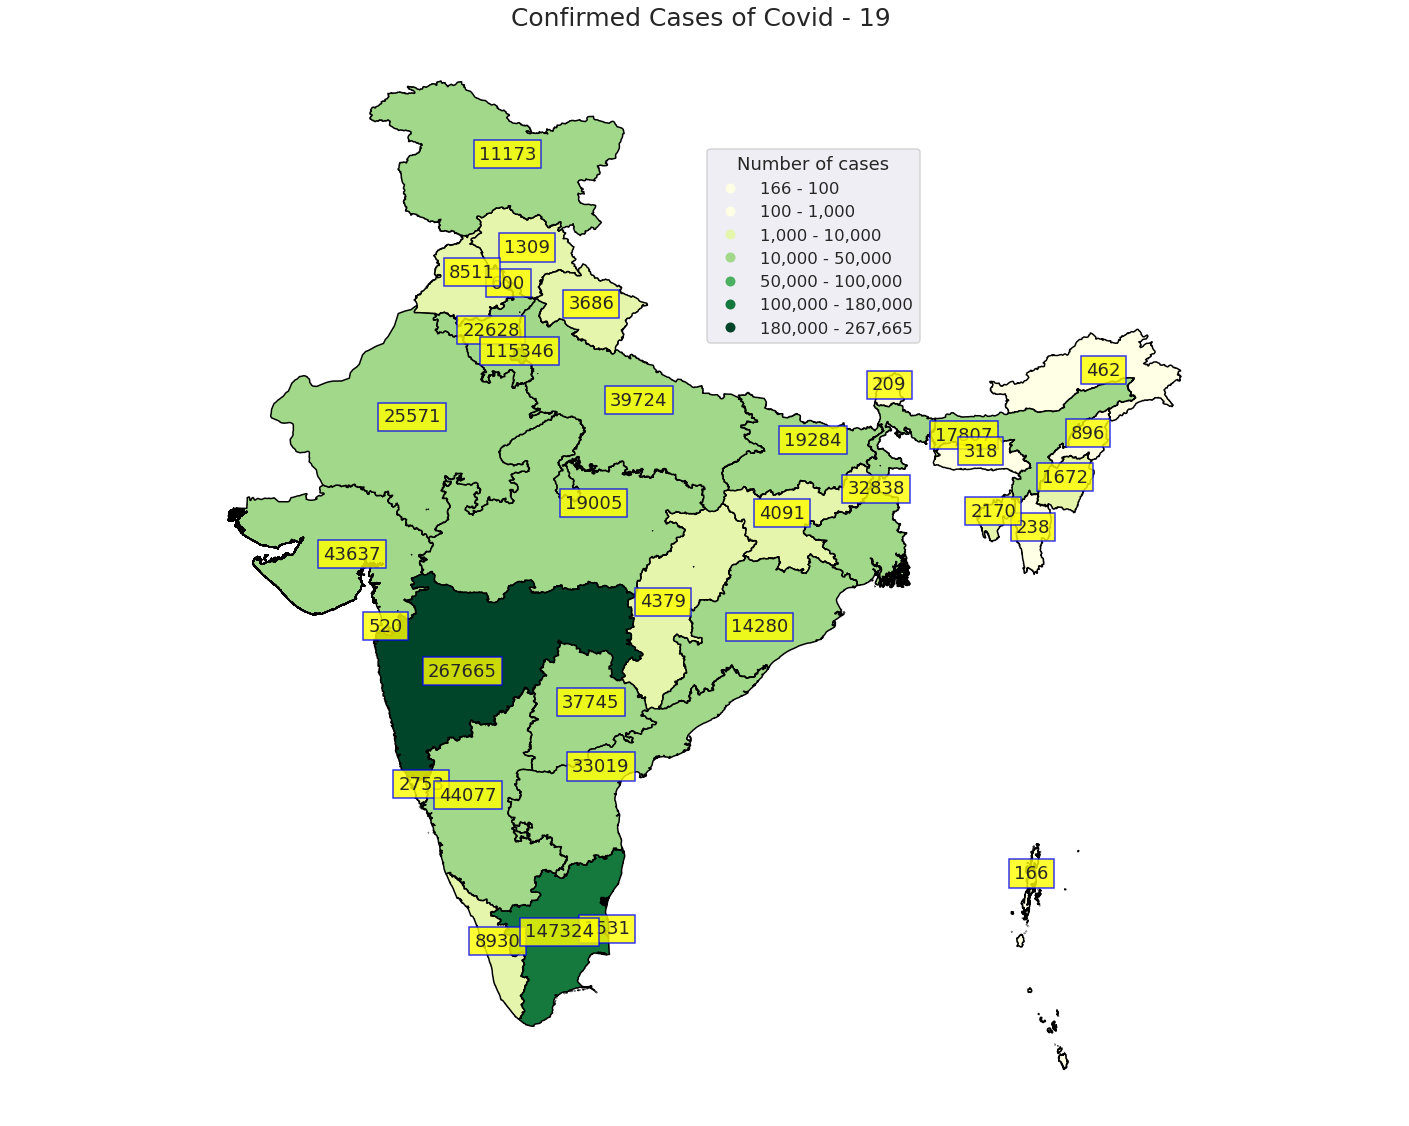

In [6]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'YlGn'
figsize = (25, 20)
ax = merged.plot(column= 'confirmed', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000,180000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['confirmed'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 5, 'edgecolor':'blue'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of cases')
ax.set_title("Confirmed Cases of Covid - 19 ", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)


#a = ax.text(65, 35, 'Total Cases \n 529,577',
           # fontsize=25,
           # )


ax.set_axis_off()
plt.axis('equal')
plt.show()

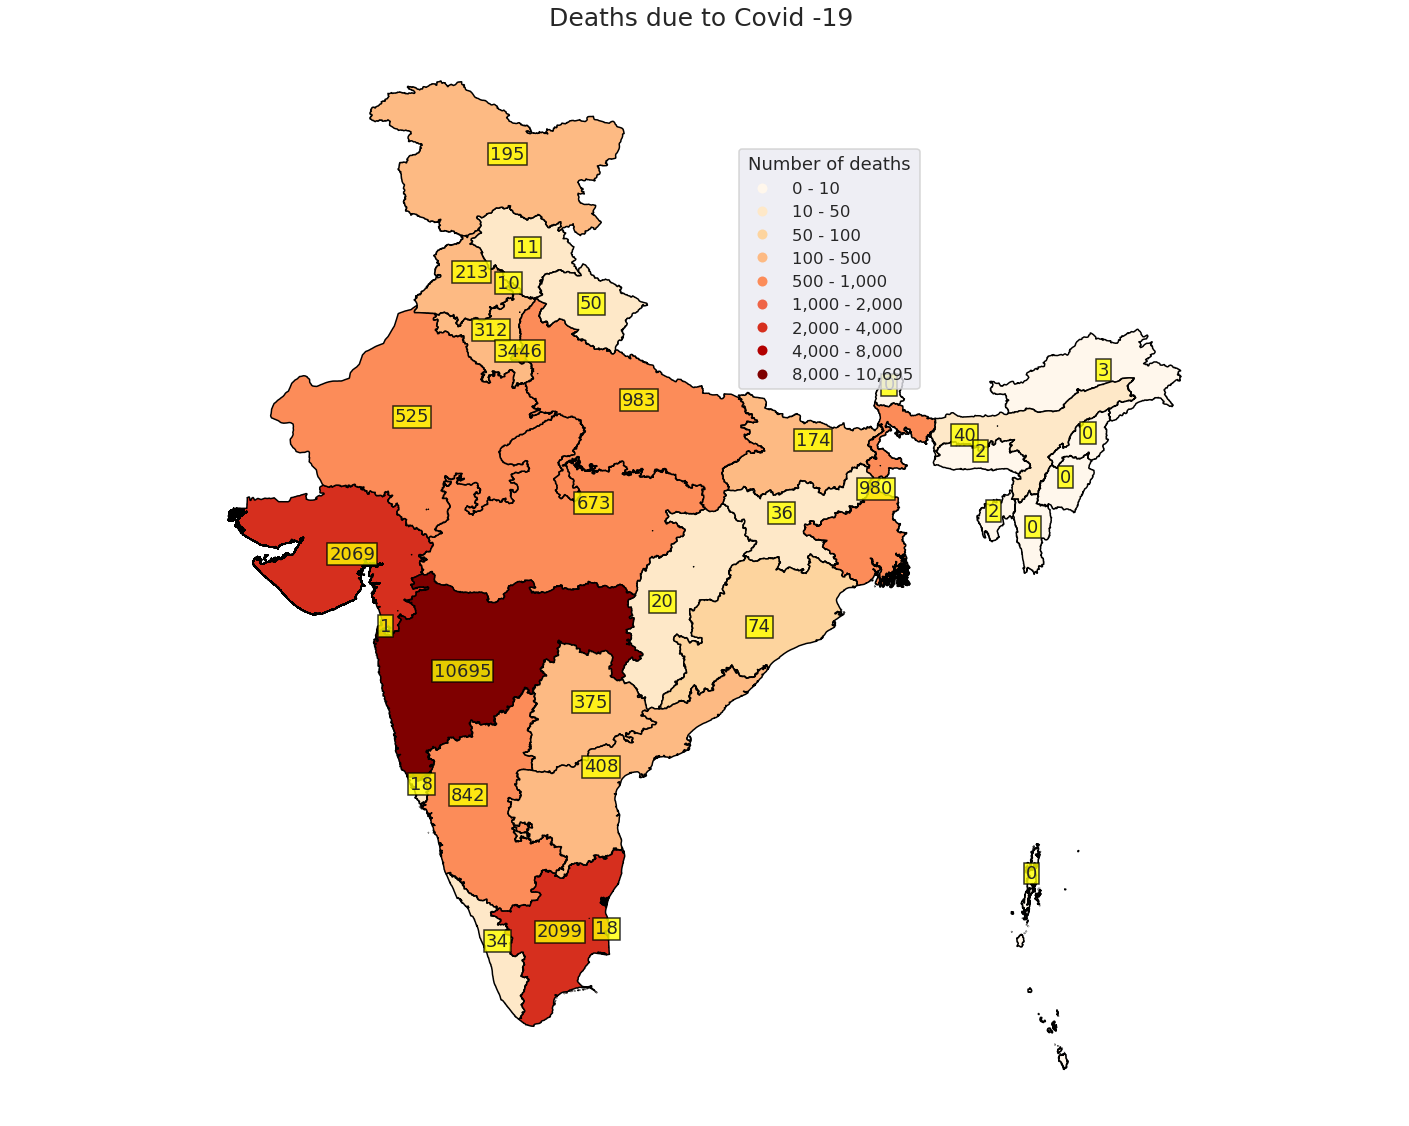

In [7]:

sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'deaths', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[10,50,100,500,1000,2000,4000,8000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['deaths'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of deaths')
ax.set_title("Deaths due to Covid -19 ", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)
#a = ax.text(65, 35, 'Total Deaths \n 16,103',
            #fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

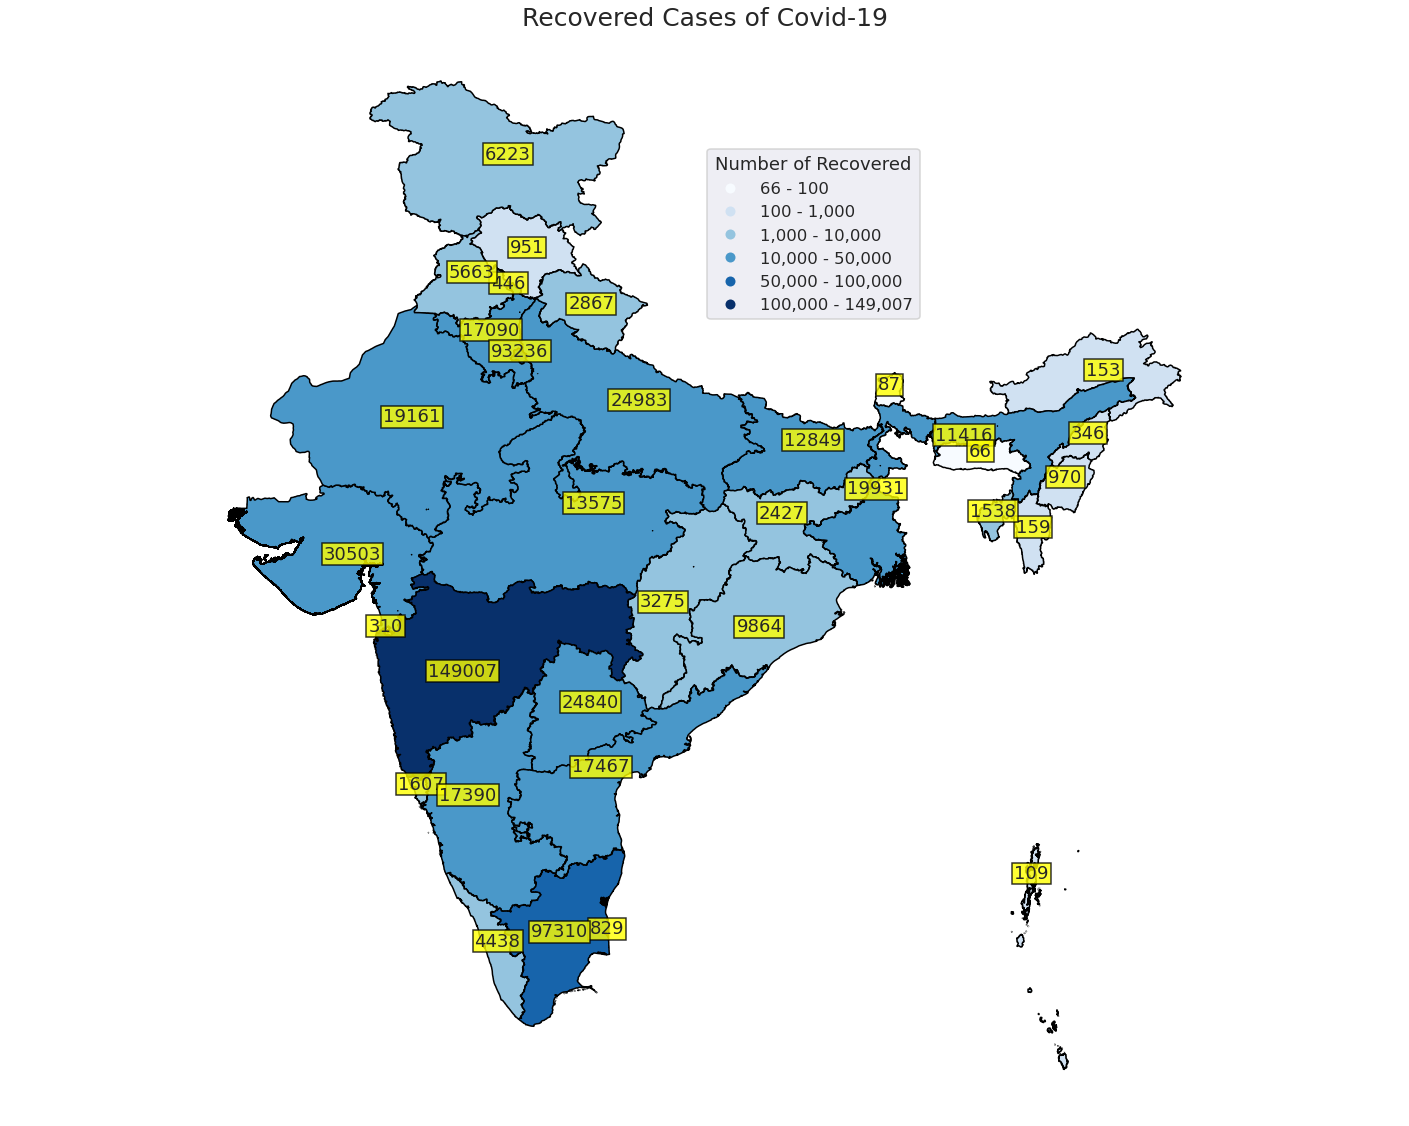

In [8]:



sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Blues'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'cured', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['cured'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of Recovered')
ax.set_title("Recovered Cases of Covid-19", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

#a = ax.text(65, 35, 'Total Recovered \n 310,146',
           # fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

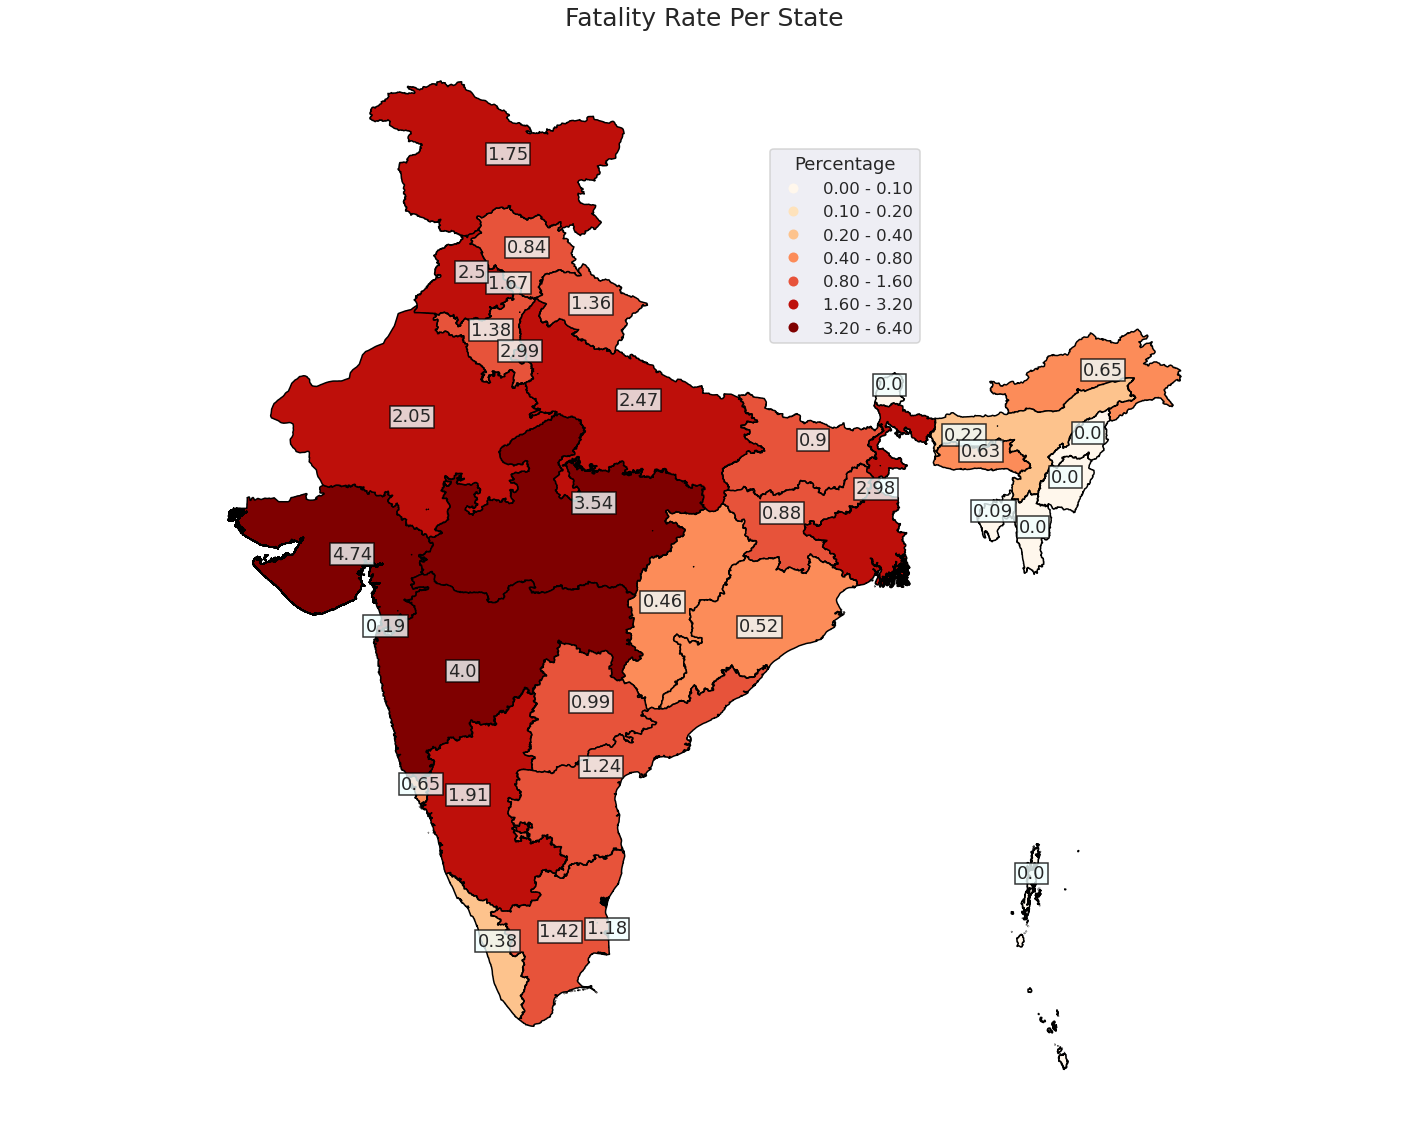

In [9]:
merged['dcratio'] = merged['deaths'] / merged['confirmed'] * 100
merged.dcratio = merged.dcratio.round(2)



sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'dcratio', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[0.1 , 0.2 , 0.4 , 0.8 , 1.6 , 3.2 , 6.4]),
                          
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['dcratio'], 
           horizontalalignment='center', bbox={'facecolor': 'azure', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Percentage')
ax.set_title("Fatality Rate Per State", size = 25)

#a = ax.text(61, 35, 'Total Death/Confirmed \n percentage \n 3.05',
           # fontsize=25,
           # )
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [10]:
confirmed = merged.sort_values('confirmed', ascending = True)

lowc = confirmed.head(10)
highc = confirmed.tail(10)


fig = px.bar(confirmed, x="confirmed", y="state", orientation='h', text = 'confirmed')
fig.update_layout(
    title_text='<b>Confirmed cases of Covid-19 per State <b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    autosize=False,
    width= 850,
    height=850)
fig.update_traces(marker_color='teal')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [11]:
deaths = merged.sort_values('deaths', ascending = True)
deaths = deaths[deaths.deaths > 0 ]
lowd = deaths.head(10)
highd = deaths.tail(10)
fig = px.bar(deaths, x="deaths", y="state", orientation='h', text = 'deaths')
fig.update_layout(
    title_text='<b>Deaths due to covid 19<b>',
    title_x=0.5,
    paper_bgcolor='rgb(255,223,0)',
    plot_bgcolor = "rgb(255,223,0)",
    autosize=False,
    width=850,
    height= 850)
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.show()

In [12]:
recovered = merged.sort_values('cured', ascending = True)
highr = recovered.head(10)
lowr = recovered.tail(10)

fig = px.bar(recovered, x="cured", y="state", orientation='h', text = 'cured')
fig.update_layout(
    title_text='<b> Recovered cases of covid 19 per State<b>',
    title_x=0.5,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='blue')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [13]:
merged = merged[merged.dcratio > 0.0]
merged = merged.sort_values('dcratio', ascending = True)
fig = px.bar(merged, x="dcratio", y="state", orientation='h', text = 'dcratio')
fig.update_layout(
    title_text='<b>Fatality Rate per State<b>',
    title_x=0.5,
    paper_bgcolor='blanchedalmond',
    plot_bgcolor = "blanchedalmond",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='darkred')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

# **Covid-19 Trend Analysis**

**Number of Cases daily**

In [14]:
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()

In [15]:
#making columns for daily new cases
df2['new_confirmed'] = df2.confirmed.diff()
df2['new_deaths'] = df2.deaths.diff()
df2['new_cured'] = df2.cured.diff()


#taking dates from 15th March
df2 = df2.iloc[44:]

In [16]:
#dropping null 
#df2 = df2.dropna()

#changing float to int
#columns = ['new_confirmed' , 'new_deaths' , 'new_cured']

#for i , c in enumerate(columns):
    #df2[c] = df2[c].astype(int)

In [17]:



fig = go.Figure(go.Bar(x= df2.date, y= df2.cured, name='Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.deaths, name='Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

<h3>Daily New Cases of Covid 19 <h3>

In [18]:



fig = go.Figure(go.Bar(x= df2.date, y= df2.new_cured, name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_deaths, name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.add_annotation(
            x= "2020-04-03",
            y=23000,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=23000,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=23000,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=23000,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 15 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
                  shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()

In [19]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_confirmed,marker_color='teal')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.add_annotation(
            x= "2020-04-03",
            y=12500,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=12500,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=12500,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=12500,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Confirmed Cases <b>',
                  title_x=0.5,
                 paper_bgcolor='aqua',
                 plot_bgcolor = "aqua",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()


Here the shaded rectangles represent the lockdown period . 

* 1st Lockdown : 25 March - 14 April (21 Days)

* 2nd Lockdown : 15 April - 3 May (19 Days)

* 3rd Lockdown : 4 May - 17 May (14 Days)

* 4th Lockdown : 18 May - 31 may (14 Days)




In [20]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_deaths,marker_color='red')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))


fig.add_annotation(
            x= "2020-06-17",
            y= 2003,
            text="<b>Highest (17 June,2003 Deaths)<b>",showarrow= True,font=dict(
            family="Courier New, monospace",
            size=15,
            color="blue"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Deaths (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='rgb(255,223,0)',
                 plot_bgcolor = "rgb(255,223,0)",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

Inference: The number of daily deaths is increasing significantly over the months. Currently the number of deaths are increasing with 350+ daily . One thing to notice about above graph is on 17 th June , India has reported 2003 Deaths. I wonder whats the reason behind the number of deaths to be high on that particular day.

> 

In [21]:



fig = go.Figure([go.Bar(x= df2.date, y= df2.new_cured,marker_color='blue')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(
    title_text='<b>Daily New Recovered Cases (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='aquamarine',
                 plot_bgcolor = "aquamarine",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

# **Statewise Analysis**

In [22]:

state = list(today.state)
cases = list(today.confirmed)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Confirmed Cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgoldenrodyellow',
    plot_bgcolor = "lightgoldenrodyellow",
    
    )

fig.show()

In [23]:
#Statewise new confirmed
df['new_confirmed'] = df.groupby(['state'])['confirmed'].diff()
df['new_deaths'] = df.groupby(['state'])['deaths'].diff()
df['new_cured'] = df.groupby(['state'])['cured'].diff()

In [24]:
#df = df.dropna()
#columns = ['new_confirmed' , 'new_deaths' , 'new_cured']

#for i , c in enumerate(columns):
    #df[c] = df[c].astype(int)

In [25]:
import plotly.express as px


fig = px.line(df, x="date", y="confirmed", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.3),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Confirmed Cases of Covid-19 in India<b> ',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

In [26]:

state = list(today.state)
cases = list(today.deaths)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Deaths in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgreen',
    plot_bgcolor = "lightgreen",
    
    )

fig.show()

In [27]:
import plotly.express as px


fig = px.line(df, x="date", y="deaths", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.2),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Deaths due to Covid-19 in India<b>',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

In [28]:

state = list(today.state)
cases = list(today.cured)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Recovered cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgreen',
    plot_bgcolor = "lightgreen",
    
    )

fig.show()

In [29]:
import plotly.express as px


fig = px.line(df, x="date", y="cured", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.2),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Recovered cases of Covid-19 in India<b>',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

In [30]:
highc = highc.sort_values('confirmed', ascending = False)
fig = px.bar(highc, x="state", y="confirmed", text = 'confirmed')
fig.update_layout(
    title_text='<b>Cases in Worst Affeced States <b>',
    title_x=0.5,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    )
fig.update_traces(marker_color='blue')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [31]:
states = ['Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat', 'Uttar Pradesh',
       'Rajasthan', 'West Bengal', 'Madhya Pradesh', 'Haryana',
       'Andhra Pradesh']



higha = df[df.state.isin(states)]

In [32]:
import plotly.express as px


fig = px.line(higha, x="date", y="confirmed", color='state')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend=dict(x= 0.07, y= 1),
    title_text='<b>Confirmed Cases in Worst affected states<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke")
fig.show()

<h2>Deaths in Worst affected states<h2>

In [33]:
highd = highd.sort_values('deaths', ascending = False)
fig = px.bar(highd, x="state", y="deaths", text = 'deaths')
fig.update_layout(
    title_text='<b> Deaths in  Worst Affeced States<b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    )
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [34]:



fig = px.line(higha, x="date", y="deaths", color='state')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.07, y= 1),
    title_text='<b>Deaths in Highly affected states<b> ',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke")
fig.show()

In [35]:
df = df[df.new_confirmed > 0]
import plotly.express as px


fig = px.line(higha, x="date", y="new_confirmed", color='state',template= "plotly_white")
fig.update_traces(mode='lines +markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.05, y= 1),
    title_text='<b>Daily New Confirmed Cases of Covid-19<b> ',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
    shapes=[
        # 1st highlight during Feb 4 - Feb 6
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        # 2nd highlight during Feb 20 - Feb 23
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()

In [36]:
df = df[df.new_deaths > 0]
import plotly.express as px


fig = px.line(higha, x="date", y="new_deaths", color='state',template= "plotly_white")
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.05, y= 1),
    title_text='<b>Daily New Deaths due to Covid-19<b>',
                  title_x=0.5,
                 
    shapes=[
        # 1st highlight during Feb 4 - Feb 6
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        # 2nd highlight during Feb 20 - Feb 23
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()

In [37]:
higha = higha[higha.new_confirmed > 0]

In [38]:
states1 = ['Maharashtra', 'Delhi']

In [39]:
#dont delete this again!!!
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 1, cols = 2 , subplot_titles= ['<b>Maharashtra<b>' , '<b>Delhi<b>'] )
for i , state in enumerate(states1):
    highan = higha[higha.state == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='blue',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.add_annotation(
            xref='x1', 
            yref='y1',
            x= "2020-05-02",
            y= 4500,
            text="Lockdown",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=14,
            color="blue"
            ),
        align="center",)
    fig.add_annotation(
            xref='x2', 
            yref='y2',
            x= "2020-05-02",
            y= 2200,
            text="Lockdown",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=14,
            color="blue"
            ),
        align="center",)
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(
                     showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='gold',
                     plot_bgcolor = "gold",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 1, cols = 2 , subplot_titles= ['<b>Maharashtra<b>' , '<b>Delhi<b>'] )
for i , state in enumerate(states1):
    highan = higha[higha.state == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_deaths, marker_color='red',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Deaths <b>',
                     title_x=0.5,
                     paper_bgcolor='lightcyan',
                     plot_bgcolor = "lightcyan",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="snow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="snow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 

In [41]:
states2 = ['Rajasthan', 'Uttar Pradesh', 'Haryana', 'Andhra Pradesh']

In [42]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=["<b>Rajasthan<b>","<b>Uttar Pradesh<b>","<b>Haryana<b>",'<b>Andhra Pradesh<b>'] )
for i , state in enumerate(states2):
    highan = higha[higha.state == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='blue',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='aqua',
                     plot_bgcolor = "aqua",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightskyblue",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightskyblue",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 
    


In [43]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=["<b>Rajasthan<b>","<b>Uttar Pradesh<b>","<b>Haryana<b>",'<b>Andhra Pradesh<b>'] )
for i , state in enumerate(states2):
    highan = higha[higha.state == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_deaths, marker_color='red',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Deaths<b>',
                     title_x=0.5,
                     paper_bgcolor='lightyellow',
                     plot_bgcolor = "lightyellow",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="snow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="snow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 

In [44]:
states3 = ['Tamil Nadu', 'West Bengal', 'Gujarat', 'Madhya Pradesh']

In [45]:
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=['<b>Tamil Nadu<b>', '<b>West Bengal<b>', '<b>Gujarat<b>', '<b>Madhya Pradesh<b>'] )
for i , state in enumerate(states3):
    highan = higha[higha.state == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='blue',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='aquamarine',
                     plot_bgcolor = "aquamarine",
                     shapes=[dict(type="rect",xref="x1",
                                  yref="paper",x0="2020-03-25",
                                  y0=0,x1="2020-05-31",y1=1,fillcolor="lightgreen",
                                  opacity=0.5,layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",
                                  yref="paper",x0="2020-03-25",
                                  y0=0,x1="2020-05-31",y1=1,fillcolor="lightgreen",
                                  opacity=0.5,layer="below",line_width=2 ),
                            
                            ]
                     )

fig.show() 
    

In [46]:
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=['<b>Tamil Nadu<b>', '<b>West Bengal<b>', '<b>Gujarat<b>', '<b>Madhya Pradesh<b>'] )
for i , state in enumerate(states3):
    highan = higha[higha.state == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_deaths, marker_color='red',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Deaths<b>',
                     title_x=0.5,
                     paper_bgcolor='cyan',
                     plot_bgcolor = "cyan",
                     shapes=[dict(type="rect",xref="x1",
                                  yref="paper",x0="2020-03-25",
                                  y0=0,x1="2020-05-31",y1=1,fillcolor="lightskyblue",
                                  opacity=0.5,layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",
                                  yref="paper",x0="2020-03-25",
                                  y0=0,x1="2020-05-31",y1=1,fillcolor="lightskyblue",
                                  opacity=0.5,layer="below",line_width=2 ),
                            
                            ]
                     )

fig.show() 

# **Testing**

In [47]:
tests.isna().sum()

Date               0
State              0
TotalSamples       0
Negative        1010
Positive          11
dtype: int64

In [48]:
#keeping only required columns
tests = tests[['Date', 'State','TotalSamples', 'Positive']]

In [49]:
#renaming column names
tests.columns = ['date','state','samples' , 'positive']

**testing of Covid -19 in India**

In [50]:
import plotly.express as px


fig = px.line(tests, x="date", y="samples", color='state',
             color_discrete_sequence=px.colors.cyclical.Phase,)
fig.update_traces(mode='lines + markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.3),
                  autosize=False,
                  width= 750,
                  height= 850,
    title_text='<b>Testing of Covid-19 in India<b> ',
                  title_x=0.5,
                 paper_bgcolor='azure',
                 plot_bgcolor = "azure")
fig.show()

In [51]:
tests

date                        state   samples  positive
0     2020-04-17  Andaman and Nicobar Islands    1403.0      12.0
1     2020-04-24  Andaman and Nicobar Islands    2679.0      27.0
2     2020-04-27  Andaman and Nicobar Islands    2848.0      33.0
3     2020-05-01  Andaman and Nicobar Islands    3754.0      33.0
4     2020-05-16  Andaman and Nicobar Islands    6677.0      33.0
...          ...                          ...       ...       ...
3166  2020-07-12                  West Bengal  617079.0   30013.0
3167  2020-07-13                  West Bengal  627438.0   31448.0
3168  2020-07-14                  West Bengal  638540.0   32838.0
3169  2020-07-15                  West Bengal  649928.0   34427.0
3170  2020-07-16                  West Bengal  663108.0   36117.0

[3171 rows x 4 columns]

In [52]:
today2 = tests[tests.date == '2020-07-14']

today2 = today2.sort_values('samples' , ascending = True)

In [53]:
state = list(today2.state)
samples = list(today2.samples)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  samples,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Testing in India<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",
    
    )

fig.show()

**Inference**: Out of all the samples tested Tamilndau has the highest share (12%) . Maharashtra Ranks Second when It comes percentage share of Samples tested.

In [54]:


fig = px.bar(today2, x="samples", y="state", orientation='h')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(
    title_text='<b>Number of Samples Tested <b>',
    title_x=0.5,
    paper_bgcolor='blanchedalmond',
    plot_bgcolor = "blanchedalmond",
    autosize=False,
    width= 800,
    height= 900)
fig.update_traces(marker_color='darkred')
fig.show()

In [55]:
today2['posper'] = today2['positive'] / today2['samples'] * 100
today2.posper = today2.posper.round(2)
today2 = today2.sort_values('posper' , ascending = True)

In [56]:

fig = px.bar(today2, x="posper", y="state", orientation='h')
fig.update_layout(
    title_text='<b>Covid Positive per Sample percentage<b>',
    title_x=0.5,
    paper_bgcolor='rgb(245, 219, 147)',
    plot_bgcolor = "rgb(245, 219, 147)",
    autosize=False,
    width= 800,
    height= 850)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(marker_color='darkviolet')
fig.show()

# **Forecasting**

<h3>Forecasting Using FB Prophet<h3>

In [57]:
#keeping date and Confirmed columns
df3 = df2[['date' , 'confirmed']]

#Renaming column names according to fb prophet
df3.columns = ['ds' , 'y']

In [58]:
#importing fbprophet
from fbprophet import Prophet

#model
m = Prophet()

#fitting the model
m.fit(df3)

In [59]:
#forecast
future = m.make_future_dataframe(periods= 20) 
future.tail()

ds
141 2020-08-02
142 2020-08-03
143 2020-08-04
144 2020-08-05
145 2020-08-06

In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)


ds          yhat    yhat_lower    yhat_upper
125 2020-07-17  9.579864e+05  9.470215e+05  9.706332e+05
126 2020-07-18  9.779094e+05  9.649906e+05  9.898120e+05
127 2020-07-19  1.000793e+06  9.893954e+05  1.013856e+06
128 2020-07-20  1.022904e+06  1.011169e+06  1.034652e+06
129 2020-07-21  1.044633e+06  1.032396e+06  1.056953e+06
130 2020-07-22  1.066557e+06  1.054113e+06  1.078994e+06
131 2020-07-23  1.088905e+06  1.077380e+06  1.101544e+06
132 2020-07-24  1.111786e+06  1.098996e+06  1.124784e+06
133 2020-07-25  1.131709e+06  1.117987e+06  1.144531e+06
134 2020-07-26  1.154593e+06  1.139204e+06  1.167914e+06
135 2020-07-27  1.176704e+06  1.159821e+06  1.192868e+06
136 2020-07-28  1.198433e+06  1.180826e+06  1.215420e+06
137 2020-07-29  1.220357e+06  1.201554e+06  1.238537e+06
138 2020-07-30  1.242704e+06  1.221102e+06  1.261460e+06
139 2020-07-31  1.265586e+06  1.243766e+06  1.285901e+06
140 2020-08-01  1.285509e+06  1.260906e+06  1.307568e+06
141 2020-08-02  1.308393e+06  1.280334e+06  1.332257e+06
142 2020-08-03  1.330504e+06  1.302748e+06  1.357829e+06
143 2020-08-04  1.352233e+06  1.322256e+06  1.380493e+06
144 2020-08-05  1.374157e+06  1.342067e+06  1.405039e+06
145 2020-08-06  1.396504e+06  1.361240e+06  1.429235e+06

In [61]:
#fig1 = m.plot(forecast)
#fig2 = m.plot_components(forecast)
from fbprophet.plot import plot_plotly
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(
                  autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Total cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",)
fig.show()

In [62]:
df4 = df2[['date' , 'deaths']]

df4.columns = ['ds', 'y']
m = Prophet()
m.fit(df4)
future = m.make_future_dataframe(periods= 20) 
#future.tail()
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Deaths  Forecast<b>',
    title_x=0.5,
    paper_bgcolor='rgb(245, 219, 147)',
    plot_bgcolor = "rgb(245, 219, 147)",)
fig.show()

In [63]:
maha = df[df.state =='Maharashtra']
maha = maha[['date', 'confirmed']]
maha.columns = ['ds', 'y']
m = Prophet()
m.fit(maha)
future = m.make_future_dataframe(periods= 20) 
#future.tail()
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Maharashtra cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",)
fig.show()

In [64]:
delhi = df[df.state =='Delhi']
delhi = delhi[['date', 'confirmed']]
delhi.columns = ['ds', 'y']
m = Prophet()
m.fit(delhi)
future = m.make_future_dataframe(periods= 20) 
#future.tail()
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Delhi cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",)
fig.show()


# Appendix

Additional Charts

Here is my attempt at Hans Rosling Chart

**Hans Rosling Chart**

In [65]:
pop = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
pop = pop[['State / Union Territory','Population']]
pop.columns = ['state','pop']
merged3 = df.merge(pop ,left_on='state', right_on='state')
merged3 = merged3[['date' , 'state' , 'deaths' ,'confirmed' , 'pop']]
#merged3.to_csv('covid.csv',index=False)

In [66]:
from IPython.core.display import HTML

HTML('''<div class="flourish-embed flourish-scatter" data-src="visualisation/2997662" data-url="https://flo.uri.sh/visualisation/2997662/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')